In [1]:
import yfinance as yf
yf.pdr_override()
import pandas_datareader.data as web
import datetime
import numpy as np
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
import tensorflow as tf
from arch import arch_model
from arch.univariate import EGARCH
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

[*********************100%***********************]  1 of 1 completed


Text(0.5, 1.0, 'DOW Returns')

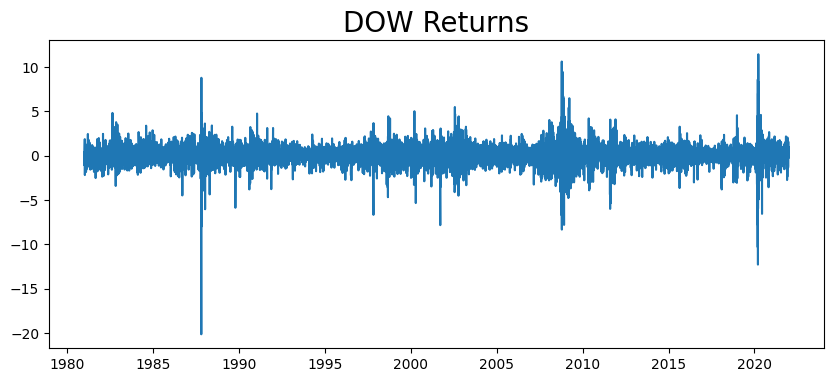

In [2]:
DOW = web.get_data_yahoo("^DJA", start = "1980-01-01", end = "2022-01-01")

returns = 100 * DOW.Close.pct_change().dropna()
plt.figure(figsize=(10,4))
plt.plot(returns)
plt.title('DOW Returns', fontsize=20)

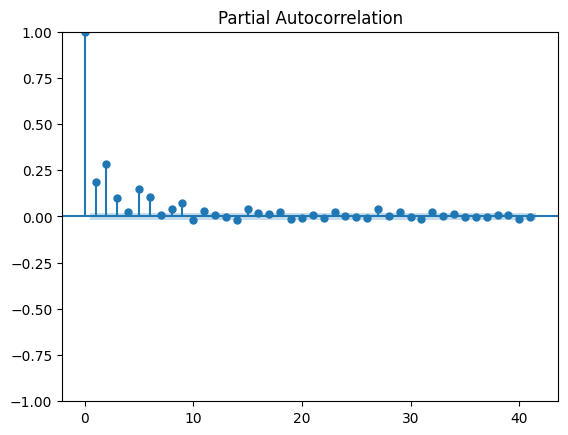

In [26]:
plot_pacf(returns**2)
plt.show()

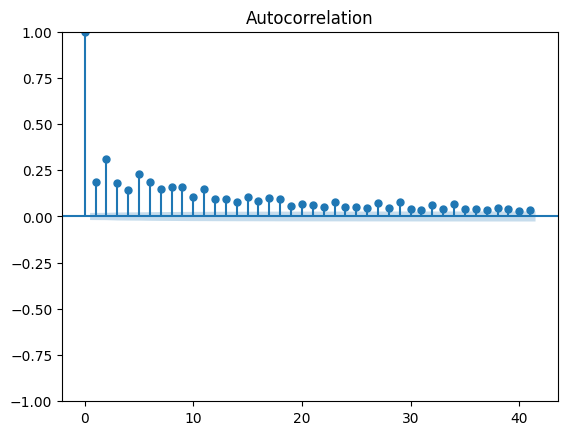

In [27]:
plot_acf(returns**2)
plt.show()

In [33]:
model = arch_model(returns, p=2, q=2)
model_fit = model.fit()
model_fit.summary()

Iteration:      1,   Func. Count:      8,   Neg. LLF: 914035408251110.8
Iteration:      2,   Func. Count:     19,   Neg. LLF: 372073279.6157297
Iteration:      3,   Func. Count:     28,   Neg. LLF: 20593.659055969656
Iteration:      4,   Func. Count:     37,   Neg. LLF: 30675.360899233587
Iteration:      5,   Func. Count:     46,   Neg. LLF: 22758.222143531704
Iteration:      6,   Func. Count:     55,   Neg. LLF: 13759.654434783013
Iteration:      7,   Func. Count:     63,   Neg. LLF: 13686.05293840099
Iteration:      8,   Func. Count:     72,   Neg. LLF: 13486.09477134038
Iteration:      9,   Func. Count:     80,   Neg. LLF: 13458.299574278166
Iteration:     10,   Func. Count:     88,   Neg. LLF: 13458.22977082666
Iteration:     11,   Func. Count:     96,   Neg. LLF: 13458.049989938998
Iteration:     12,   Func. Count:    104,   Neg. LLF: 13458.250002975114
Iteration:     13,   Func. Count:    112,   Neg. LLF: 13457.828186322338
Iteration:     14,   Func. Count:    120,   Neg. LLF: 13

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -13456.0
Distribution:                  Normal   AIC:                           26924.1
Method:            Maximum Likelihood   BIC:                           26967.6
                                        No. Observations:                10344
Date:                Sun, Jan 15 2023   Df Residuals:                    10343
Time:                        15:30:52   Df Model:                            1
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu             0.0622  8.147e-03      7.640  2.166e-14 [4.628e-02,7.822e-02]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega          0.0436  9.189e-03      4.748  2.056e-06 [2.562e-02,6.163e-02]
alpha[1]       0.0921  2.498e-02      3.686  2.274e-04   [4.313e-02,  0.141]
alpha[2]       0.0847  1.742e-02      4.864  1.149e-06   [5.059e-02,  0.119]
beta[1]        0.1424      0.129      1.101      0.271     [ -0.111,  0.396]
beta[2]        0.6388      0.112      5.711  1.123e-08     [  0.420,  0.858]
============================================================================

Covariance estimator: robust
"""

In [39]:
model = arch_model(returns,vol = "EGARCH", p=1, q=1)
model_fit = model.fit()
model_fit.summary()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 1096351822639800.1
Iteration:      2,   Func. Count:     15,   Neg. LLF: 5397839389.618103
Iteration:      3,   Func. Count:     24,   Neg. LLF: 13210925250688.264
Iteration:      4,   Func. Count:     34,   Neg. LLF: 20780.129647330818
Iteration:      5,   Func. Count:     42,   Neg. LLF: 13512.61029998216
Iteration:      6,   Func. Count:     48,   Neg. LLF: 13490.890366880005
Iteration:      7,   Func. Count:     53,   Neg. LLF: 13490.88901424692
Iteration:      8,   Func. Count:     58,   Neg. LLF: 13490.889009973549
Iteration:      9,   Func. Count:     62,   Neg. LLF: 13490.88900997575
Optimization terminated successfully    (Exit mode 0)
            Current function value: 13490.889009973549
            Iterations: 9
            Function evaluations: 62
            Gradient evaluations: 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - EGARCH Model Results                     
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                     EGARCH   Log-Likelihood:               -13490.9
Distribution:                  Normal   AIC:                           26989.8
Method:            Maximum Likelihood   BIC:                           27018.8
                                        No. Observations:                10344
Date:                Sun, Jan 15 2023   Df Residuals:                    10343
Time:                        15:32:07   Df Model:                            1
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu             0.0607  6.468e-03      9.383  6.420e-21 [4.801e-02,7.336e-02]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega      4.7190e-03  2.910e-03      1.621      0.105 [-9.851e-04,1.042e-02]
alpha[1]       0.2138  2.999e-02      7.128  1.018e-12      [  0.155,  0.273]
beta[1]        0.9741  4.863e-03    200.290      0.000      [  0.965,  0.984]
=============================================================================

Covariance estimator: robust
"""

In [109]:
model = arch_model(returns, p=1, o=1, q=1)
model_fit = model.fit()
model_fit.summary()

Iteration:      1,   Func. Count:      7,   Neg. LLF: 283070760666.64386
Iteration:      2,   Func. Count:     16,   Neg. LLF: 132278291868.0602
Iteration:      3,   Func. Count:     25,   Neg. LLF: 16268.681337297152
Iteration:      4,   Func. Count:     34,   Neg. LLF: 21925.09807605723
Iteration:      5,   Func. Count:     42,   Neg. LLF: 13370.36338278537
Iteration:      6,   Func. Count:     49,   Neg. LLF: 15756.121369623725
Iteration:      7,   Func. Count:     57,   Neg. LLF: 13367.887416947447
Iteration:      8,   Func. Count:     64,   Neg. LLF: 13345.903431838415
Iteration:      9,   Func. Count:     71,   Neg. LLF: 13344.971275145552
Iteration:     10,   Func. Count:     77,   Neg. LLF: 13344.9661961864
Iteration:     11,   Func. Count:     83,   Neg. LLF: 13344.966191272568
Iteration:     12,   Func. Count:     88,   Neg. LLF: 13344.966191269883
Optimization terminated successfully    (Exit mode 0)
            Current function value: 13344.966191272568
            Iteratio

<class 'statsmodels.iolib.summary.Summary'>
"""
                   Constant Mean - GJR-GARCH Model Results                    
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                  GJR-GARCH   Log-Likelihood:               -13345.0
Distribution:                  Normal   AIC:                           26699.9
Method:            Maximum Likelihood   BIC:                           26736.2
                                        No. Observations:                10344
Date:                Sun, Jan 15 2023   Df Residuals:                    10343
Time:                        18:22:51   Df Model:                            1
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu             0.0381  7.897e-03      4.825  1.401e-06 [2.262e-02,5.358e-02]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega          0.0253  4.995e-03      5.059  4.224e-07 [1.548e-02,3.506e-02]
alpha[1]       0.0251  5.993e-03      4.189  2.803e-05 [1.336e-02,3.685e-02]
gamma[1]       0.1247  2.204e-02      5.659  1.526e-08   [8.154e-02,  0.168]
beta[1]        0.8859  1.525e-02     58.106      0.000     [  0.856,  0.916]
============================================================================

Covariance estimator: robust
"""

In [13]:
split_time_1 = 8240
split_time_2 = 10580

train_idx = returns.index[:split_time_1]
val_idx = returns.index[split_time_1:split_time_2]
test_idx = returns.index[split_time_2:]

In [14]:
returns.index[8240]
ts_train = returns[train_idx]
ts_val = returns[val_idx]
ts_test = returns[test_idx]

In [18]:
len(vol_train)

8240

In [16]:
def get_volatility(ts, window=None):
    """
    Get the volatility of a time series as the standard deviation of an index's
    price returns using cumulative moving average or rolling window average
    depending on whether or not window parameter is specified
    """
    if window:
        ma = ts.rolling(window).mean()
    else:
        ma = ts.expanding().mean()
    output = ((ts - ma)**2)**.5

    return output

In [17]:
WINDOW_SIZE = 14

# CALCULATING VOLATILITY ON A 14 DAY PERIOD
vols = get_volatility(returns, window=WINDOW_SIZE)

vol_train = vols[train_idx]
vol_val = vols[val_idx]
vol_test = vols[test_idx]



In [20]:
vol_train = vol_train.dropna()
vol_train

Date
1981-01-14    0.293969
1981-01-15    0.753438
1981-01-16    0.718043
1981-01-19    0.045196
1981-01-20    1.819153
                ...   
2013-08-19    0.395046
2013-08-20    0.594170
2013-08-21    0.367804
2013-08-22    1.259865
2013-08-23    0.565754
Name: Close, Length: 8227, dtype: float64

In [21]:
ma = returns.rolling(WINDOW_SIZE).mean()
ewma = returns.ewm(span=WINDOW_SIZE).mean()

In [22]:
mean_train_vol = vol_train.mean()
mean_train_vol

0.7098898666050106

In [23]:
def RMSE(y_true, y_pred):
    """
    Compute Root Mean Squared Error between 2 arrays
    """
    output = np.sqrt(mse(y_true, y_pred))
    return output

In [50]:
rolling_forecasts = []

# ITERATE OVER EACH TIME STEP IN THE VALIDATION SET
for i in range(len(ts_val)):

    # GET THE DATA AT ALL PREVIOUS TIME STEPS
    idx = val_idx[i]
    ts_train = returns[:idx]

    # TRAIN MODEL USING ALL PREVIOUS TIME STEPS' DATA
    model = arch_model(ts_train, vol='GARCH', p=2, q=2,
                       mean='constant', dist='normal')
    model_fit = model.fit(disp='off')

    # MAKE PREDICTION
    pred = (model_fit.forecast(horizon=1, reindex=False).variance.values[0][0])**.5

    # APPEND TO rolling_forecasts LIST
    rolling_forecasts.append(pred)

In [51]:
rolling_predictions = pd.Series(rolling_forecasts, index=ts_val.index)
print(RMSE(vol_val, rolling_predictions))
print(mae(vol_val, rolling_predictions))


0.6595901457699533
0.47733356499676577


In [52]:
rolling_forecasts = []

# ITERATE OVER EACH TIME STEP IN THE VALIDATION SET
for i in range(len(ts_val)):

    # GET THE DATA AT ALL PREVIOUS TIME STEPS
    idx = val_idx[i]
    ts_train = returns[:idx]

    # TRAIN MODEL USING ALL PREVIOUS TIME STEPS' DATA
    model = arch_model(ts_train, vol='EGARCH', p=1, q=1,
                       mean='constant', dist='normal')
    model_fit = model.fit(disp='off')

    # MAKE PREDICTION
    pred = (model_fit.forecast(horizon=1, reindex=False).variance.values[0][0])**.5

    # APPEND TO rolling_forecasts LIST
    rolling_forecasts.append(pred)

In [53]:
rolling_predictions = pd.Series(rolling_forecasts, index=ts_val.index)
print(RMSE(vol_val, rolling_predictions))
print(mae(vol_val, rolling_predictions))


0.6469339700526994
0.46719134595442496


In [110]:
rolling_forecasts = []

# ITERATE OVER EACH TIME STEP IN THE VALIDATION SET
for i in range(len(ts_val)):

    # GET THE DATA AT ALL PREVIOUS TIME STEPS
    idx = val_idx[i]
    ts_train = returns[:idx]

    # TRAIN MODEL USING ALL PREVIOUS TIME STEPS' DATA
    model = arch_model(ts_train, p=1,o=1,q=1,
                       mean='constant', dist='normal')
    model_fit = model.fit(disp='off')

    # MAKE PREDICTION
    pred = (model_fit.forecast(horizon=1, reindex=False).variance.values[0][0])**.5

    # APPEND TO rolling_forecasts LIST
    rolling_forecasts.append(pred)

In [111]:
rolling_predictions = pd.Series(rolling_forecasts, index=ts_val.index)
print(RMSE(vol_val, rolling_predictions))
print(mae(vol_val, rolling_predictions))

0.6486745952075813
0.47100451027689944


In [56]:
import tensorflow as tf
from tensorflow.python.keras.models import Sequential, load_model
from tensorflow.python.keras.layers.core import Dense
from tensorflow.python.keras.layers.recurrent import LSTM
from tensorflow.python.keras import optimizers
from tensorflow.python.keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
import seaborn as sns
from keras.optimizers import adam_v2

In [57]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    dataset = tf.data.Dataset.from_tensor_slices(series)
    dataset = dataset.window(window_size+1, shift=1, drop_remainder=True)
    dataset = dataset.flat_map(lambda window: window.batch(window_size+1))
    dataset = dataset.shuffle(shuffle_buffer).map(lambda window: (window[:-1], window[-1]))
    dataset = dataset.batch(batch_size).prefetch(1)
    
    return dataset

In [104]:
window_size = 14
batch_size = 10
shuffle_buffer_size = 1000


dataset = windowed_dataset(vol_train, window_size, batch_size, shuffle_buffer_size)
val_dataset = windowed_dataset(vol_val, window_size, 10, 1000)

In [105]:
model = Sequential()

model.add(Dense(1, input_shape=(window_size, ), activation="tanh"))
model.add(Dense(1))


model.compile(loss='mae', optimizer='adam', metrics=[tf.keras.metrics.MeanSquaredError()])

model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_26 (Dense)             (None, 1)                 15        
_________________________________________________________________
dense_27 (Dense)             (None, 1)                 2         
Total params: 17
Trainable params: 17
Non-trainable params: 0
_________________________________________________________________


In [106]:
history = model.fit(dataset, epochs=150, validation_data = val_dataset, verbose=1)

Epoch 1/150
822/822 [==============================] - 1s 539us/step - loss: 0.4640 - mean_squared_error: 0.5007 - val_loss: 0.4474 - val_mean_squared_error: 0.5899
Epoch 2/150
822/822 [==============================] - 0s 475us/step - loss: 0.4627 - mean_squared_error: 0.5909 - val_loss: 0.4478 - val_mean_squared_error: 0.6047
Epoch 3/150
822/822 [==============================] - 0s 470us/step - loss: 0.4622 - mean_squared_error: 0.5970 - val_loss: 0.4431 - val_mean_squared_error: 0.6066
Epoch 4/150
822/822 [==============================] - 0s 480us/step - loss: 0.4609 - mean_squared_error: 0.6011 - val_loss: 0.4412 - val_mean_squared_error: 0.6049
Epoch 5/150
822/822 [==============================] - 0s 480us/step - loss: 0.4594 - mean_squared_error: 0.6031 - val_loss: 0.4362 - val_mean_squared_error: 0.6076
Epoch 6/150
822/822 [==============================] - 0s 472us/step - loss: 0.4568 - mean_squared_error: 0.6026 - val_loss: 0.4320 - val_mean_squared_error: 0.6030
Epoch 7/15

822/822 [==============================] - 0s 484us/step - loss: 0.4451 - mean_squared_error: 0.5423 - val_loss: 0.4167 - val_mean_squared_error: 0.5423
Epoch 51/150
822/822 [==============================] - 0s 485us/step - loss: 0.4450 - mean_squared_error: 0.5419 - val_loss: 0.4161 - val_mean_squared_error: 0.5418
Epoch 52/150
822/822 [==============================] - 0s 488us/step - loss: 0.4454 - mean_squared_error: 0.5414 - val_loss: 0.4153 - val_mean_squared_error: 0.5413
Epoch 53/150
822/822 [==============================] - 0s 485us/step - loss: 0.4449 - mean_squared_error: 0.5408 - val_loss: 0.4170 - val_mean_squared_error: 0.5409
Epoch 54/150
822/822 [==============================] - 0s 479us/step - loss: 0.4446 - mean_squared_error: 0.5405 - val_loss: 0.4163 - val_mean_squared_error: 0.5404
Epoch 55/150
822/822 [==============================] - 0s 482us/step - loss: 0.4446 - mean_squared_error: 0.5400 - val_loss: 0.4154 - val_mean_squared_error: 0.5400
Epoch 56/150
822/

822/822 [==============================] - 0s 482us/step - loss: 0.4441 - mean_squared_error: 0.5294 - val_loss: 0.4148 - val_mean_squared_error: 0.5295
Epoch 100/150
822/822 [==============================] - 0s 473us/step - loss: 0.4444 - mean_squared_error: 0.5293 - val_loss: 0.4155 - val_mean_squared_error: 0.5293
Epoch 101/150
822/822 [==============================] - 0s 467us/step - loss: 0.4442 - mean_squared_error: 0.5291 - val_loss: 0.4162 - val_mean_squared_error: 0.5292
Epoch 102/150
822/822 [==============================] - 0s 484us/step - loss: 0.4432 - mean_squared_error: 0.5291 - val_loss: 0.4157 - val_mean_squared_error: 0.5291
Epoch 103/150
822/822 [==============================] - 0s 485us/step - loss: 0.4433 - mean_squared_error: 0.5289 - val_loss: 0.4153 - val_mean_squared_error: 0.5289
Epoch 104/150
822/822 [==============================] - 0s 478us/step - loss: 0.4441 - mean_squared_error: 0.5288 - val_loss: 0.4175 - val_mean_squared_error: 0.5288
Epoch 105/15

822/822 [==============================] - 0s 494us/step - loss: 0.4440 - mean_squared_error: 0.5244 - val_loss: 0.4144 - val_mean_squared_error: 0.5244
Epoch 149/150
822/822 [==============================] - 0s 517us/step - loss: 0.4437 - mean_squared_error: 0.5243 - val_loss: 0.4176 - val_mean_squared_error: 0.5243
Epoch 150/150
822/822 [==============================] - 0s 480us/step - loss: 0.4433 - mean_squared_error: 0.5242 - val_loss: 0.4153 - val_mean_squared_error: 0.5242


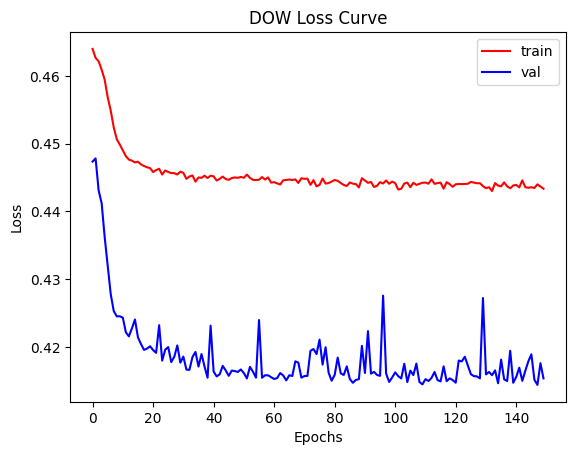

In [107]:
def plot_error(train_loss, val_loss):
    plt.plot(train_loss,c = 'r')
    plt.plot(val_loss,c = 'b')
    plt.ylabel('Loss')
    plt.xlabel('Epochs')
    plt.title("DOW Loss Curve")
    plt.legend(['train', 'val'],loc = 'upper right')
    #plt.savefig('Thesis Document\\KF5 Figures\\NN (5,1,1)\\' + sector + '\\' + sector + ' - NN(5,1,1) Train vs. Validation.png')
    plt.show()

train_error = history.history['loss']
val_error = history.history['val_loss']
plot_error(train_error, val_error)

In [89]:
rolling_forecasts = []

# ITERATE OVER EACH TIME STEP IN THE VALIDATION SET
for i in range(len(ts_val)):

    # GET THE DATA AT ALL PREVIOUS TIME STEPS
    idx = val_idx[i]
    ts_train = returns[:idx]

    # TRAIN MODEL USING ALL PREVIOUS TIME STEPS' DATA
    model = arch_model(ts_train, vol='GARCH', p=2, q=2,
                       mean='constant', dist='normal')
    model_fit = model.fit(disp='off')

    # MAKE PREDICTION
    pred = (model_fit.forecast(horizon=1, reindex=False).variance.values[0][0])**.5

    # APPEND TO rolling_forecasts LIST
    rolling_forecasts.append(pred)

In [90]:
dataset = windowed_dataset(rolling_forecasts, window_size, batch_size, shuffle_buffer_size)
val_dataset = windowed_dataset(rolling_forecasts, window_size, 10, 1000)

In [91]:
model = Sequential()

model.add(Dense(1, input_shape=(window_size, ), activation="tanh"))
model.add(Dense(1))


model.compile(loss='mae', optimizer='adam', metrics=[tf.keras.metrics.MeanSquaredError()])

model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 1)                 15        
_________________________________________________________________
dense_21 (Dense)             (None, 1)                 2         
Total params: 17
Trainable params: 17
Non-trainable params: 0
_________________________________________________________________


In [92]:
history2 = model.fit(dataset, epochs=150, validation_data = val_dataset, verbose=1)

Epoch 1/150
209/209 [==============================] - 0s 1ms/step - loss: 0.2743 - mean_squared_error: 0.3618 - val_loss: 0.1599 - val_mean_squared_error: 0.2763
Epoch 2/150
209/209 [==============================] - 0s 784us/step - loss: 0.1555 - mean_squared_error: 0.2637 - val_loss: 0.1509 - val_mean_squared_error: 0.2495
Epoch 3/150
209/209 [==============================] - 0s 762us/step - loss: 0.1462 - mean_squared_error: 0.2428 - val_loss: 0.1412 - val_mean_squared_error: 0.2392
Epoch 4/150
209/209 [==============================] - 0s 755us/step - loss: 0.1373 - mean_squared_error: 0.2358 - val_loss: 0.1340 - val_mean_squared_error: 0.2310
Epoch 5/150
209/209 [==============================] - 0s 780us/step - loss: 0.1297 - mean_squared_error: 0.2294 - val_loss: 0.1261 - val_mean_squared_error: 0.2252
Epoch 6/150
209/209 [==============================] - 0s 779us/step - loss: 0.1232 - mean_squared_error: 0.2226 - val_loss: 0.1204 - val_mean_squared_error: 0.2203
Epoch 7/150


209/209 [==============================] - 0s 841us/step - loss: 0.0789 - mean_squared_error: 0.1341 - val_loss: 0.0769 - val_mean_squared_error: 0.1336
Epoch 51/150
209/209 [==============================] - 0s 776us/step - loss: 0.0785 - mean_squared_error: 0.1332 - val_loss: 0.0813 - val_mean_squared_error: 0.1328
Epoch 52/150
209/209 [==============================] - 0s 797us/step - loss: 0.0780 - mean_squared_error: 0.1323 - val_loss: 0.0761 - val_mean_squared_error: 0.1319
Epoch 53/150
209/209 [==============================] - 0s 782us/step - loss: 0.0779 - mean_squared_error: 0.1314 - val_loss: 0.0791 - val_mean_squared_error: 0.1310
Epoch 54/150
209/209 [==============================] - 0s 792us/step - loss: 0.0770 - mean_squared_error: 0.1306 - val_loss: 0.0768 - val_mean_squared_error: 0.1302
Epoch 55/150
209/209 [==============================] - 0s 822us/step - loss: 0.0775 - mean_squared_error: 0.1298 - val_loss: 0.0768 - val_mean_squared_error: 0.1293
Epoch 56/150
209/

209/209 [==============================] - 0s 793us/step - loss: 0.0609 - mean_squared_error: 0.1015 - val_loss: 0.0588 - val_mean_squared_error: 0.1013
Epoch 100/150
209/209 [==============================] - 0s 770us/step - loss: 0.0625 - mean_squared_error: 0.1010 - val_loss: 0.0589 - val_mean_squared_error: 0.1008
Epoch 101/150
209/209 [==============================] - 0s 825us/step - loss: 0.0614 - mean_squared_error: 0.1005 - val_loss: 0.0588 - val_mean_squared_error: 0.1003
Epoch 102/150
209/209 [==============================] - 0s 783us/step - loss: 0.0609 - mean_squared_error: 0.1000 - val_loss: 0.0632 - val_mean_squared_error: 0.0998
Epoch 103/150
209/209 [==============================] - 0s 790us/step - loss: 0.0613 - mean_squared_error: 0.0995 - val_loss: 0.0579 - val_mean_squared_error: 0.0993
Epoch 104/150
209/209 [==============================] - 0s 821us/step - loss: 0.0606 - mean_squared_error: 0.0990 - val_loss: 0.0576 - val_mean_squared_error: 0.0988
Epoch 105/15

209/209 [==============================] - 0s 814us/step - loss: 0.0504 - mean_squared_error: 0.0808 - val_loss: 0.0500 - val_mean_squared_error: 0.0806
Epoch 149/150
209/209 [==============================] - 0s 771us/step - loss: 0.0496 - mean_squared_error: 0.0804 - val_loss: 0.0508 - val_mean_squared_error: 0.0803
Epoch 150/150
209/209 [==============================] - 0s 824us/step - loss: 0.0486 - mean_squared_error: 0.0801 - val_loss: 0.0494 - val_mean_squared_error: 0.0799


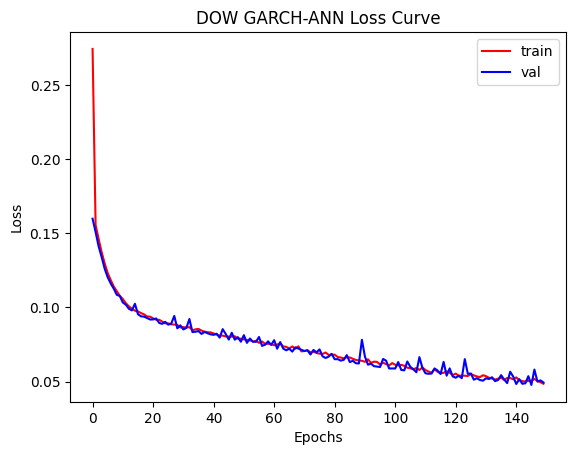

In [93]:
def plot_error(train_loss, val_loss):
    plt.plot(train_loss,c = 'r')
    plt.plot(val_loss,c = 'b')
    plt.ylabel('Loss')
    plt.xlabel('Epochs')
    plt.title("DOW GARCH-ANN Loss Curve")
    plt.legend(['train', 'val'],loc = 'upper right')
    #plt.savefig('Thesis Document\\KF5 Figures\\NN (5,1,1)\\' + sector + '\\' + sector + ' - NN(5,1,1) Train vs. Validation.png')
    plt.show()
train_error2 = history2.history['loss']
val_error2 = history2.history['val_loss']
plot_error(train_error2, val_error2)

In [94]:
rolling_forecasts = []

# ITERATE OVER EACH TIME STEP IN THE VALIDATION SET
for i in range(len(ts_val)):

    # GET THE DATA AT ALL PREVIOUS TIME STEPS
    idx = val_idx[i]
    ts_train = returns[:idx]

    # TRAIN MODEL USING ALL PREVIOUS TIME STEPS' DATA
    model = arch_model(ts_train, vol='EGARCH', p=1, q=1,
                       mean='constant', dist='normal')
    model_fit = model.fit(disp='off')

    # MAKE PREDICTION
    pred = (model_fit.forecast(horizon=1, reindex=False).variance.values[0][0])**.5

    # APPEND TO rolling_forecasts LIST
    rolling_forecasts.append(pred)

In [95]:
dataset = windowed_dataset(rolling_forecasts, window_size, batch_size, shuffle_buffer_size)
val_dataset = windowed_dataset(rolling_forecasts, window_size, 10, 1000)

In [96]:
model = Sequential()

model.add(Dense(1, input_shape=(window_size, ), activation="tanh"))
# model.add(Dense(4, activation="sigmoid"))
model.add(Dense(1))
opt = adam_v2.Adam(learning_rate=0.01, decay=1e-6)



model.compile(loss='mae', optimizer='adam', metrics=[tf.keras.metrics.MeanSquaredError()])



model.summary()



Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 1)                 15        
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 2         
Total params: 17
Trainable params: 17
Non-trainable params: 0
_________________________________________________________________


In [97]:
history2 = model.fit(dataset, epochs=150, validation_data = val_dataset, verbose=1)

Epoch 1/150
209/209 [==============================] - 0s 1ms/step - loss: 0.2065 - mean_squared_error: 0.1275 - val_loss: 0.1905 - val_mean_squared_error: 0.1977
Epoch 2/150
209/209 [==============================] - 0s 772us/step - loss: 0.1809 - mean_squared_error: 0.1982 - val_loss: 0.1717 - val_mean_squared_error: 0.1966
Epoch 3/150
209/209 [==============================] - 0s 808us/step - loss: 0.1594 - mean_squared_error: 0.1905 - val_loss: 0.1486 - val_mean_squared_error: 0.1862
Epoch 4/150
209/209 [==============================] - 0s 781us/step - loss: 0.1390 - mean_squared_error: 0.1813 - val_loss: 0.1299 - val_mean_squared_error: 0.1760
Epoch 5/150
209/209 [==============================] - 0s 774us/step - loss: 0.1229 - mean_squared_error: 0.1727 - val_loss: 0.1168 - val_mean_squared_error: 0.1685
Epoch 6/150
209/209 [==============================] - 0s 829us/step - loss: 0.1135 - mean_squared_error: 0.1643 - val_loss: 0.1098 - val_mean_squared_error: 0.1610
Epoch 7/150


209/209 [==============================] - 0s 843us/step - loss: 0.0730 - mean_squared_error: 0.0925 - val_loss: 0.0720 - val_mean_squared_error: 0.0921
Epoch 51/150
209/209 [==============================] - 0s 997us/step - loss: 0.0727 - mean_squared_error: 0.0918 - val_loss: 0.0722 - val_mean_squared_error: 0.0915
Epoch 52/150
209/209 [==============================] - 0s 832us/step - loss: 0.0721 - mean_squared_error: 0.0912 - val_loss: 0.0770 - val_mean_squared_error: 0.0908
Epoch 53/150
209/209 [==============================] - 0s 823us/step - loss: 0.0723 - mean_squared_error: 0.0905 - val_loss: 0.0713 - val_mean_squared_error: 0.0902
Epoch 54/150
209/209 [==============================] - 0s 939us/step - loss: 0.0723 - mean_squared_error: 0.0898 - val_loss: 0.0701 - val_mean_squared_error: 0.0895
Epoch 55/150
209/209 [==============================] - 0s 947us/step - loss: 0.0722 - mean_squared_error: 0.0892 - val_loss: 0.0698 - val_mean_squared_error: 0.0889
Epoch 56/150
209/

209/209 [==============================] - 0s 818us/step - loss: 0.0589 - mean_squared_error: 0.0677 - val_loss: 0.0578 - val_mean_squared_error: 0.0675
Epoch 100/150
209/209 [==============================] - 0s 770us/step - loss: 0.0590 - mean_squared_error: 0.0673 - val_loss: 0.0593 - val_mean_squared_error: 0.0671
Epoch 101/150
209/209 [==============================] - 0s 824us/step - loss: 0.0589 - mean_squared_error: 0.0669 - val_loss: 0.0588 - val_mean_squared_error: 0.0667
Epoch 102/150
209/209 [==============================] - 0s 802us/step - loss: 0.0590 - mean_squared_error: 0.0665 - val_loss: 0.0587 - val_mean_squared_error: 0.0664
Epoch 103/150
209/209 [==============================] - 0s 789us/step - loss: 0.0577 - mean_squared_error: 0.0662 - val_loss: 0.0562 - val_mean_squared_error: 0.0660
Epoch 104/150
209/209 [==============================] - 0s 806us/step - loss: 0.0584 - mean_squared_error: 0.0658 - val_loss: 0.0564 - val_mean_squared_error: 0.0656
Epoch 105/15

209/209 [==============================] - 0s 783us/step - loss: 0.0535 - mean_squared_error: 0.0529 - val_loss: 0.0516 - val_mean_squared_error: 0.0527
Epoch 149/150
209/209 [==============================] - 0s 777us/step - loss: 0.0522 - mean_squared_error: 0.0526 - val_loss: 0.0506 - val_mean_squared_error: 0.0525
Epoch 150/150
209/209 [==============================] - 0s 778us/step - loss: 0.0528 - mean_squared_error: 0.0524 - val_loss: 0.0500 - val_mean_squared_error: 0.0523


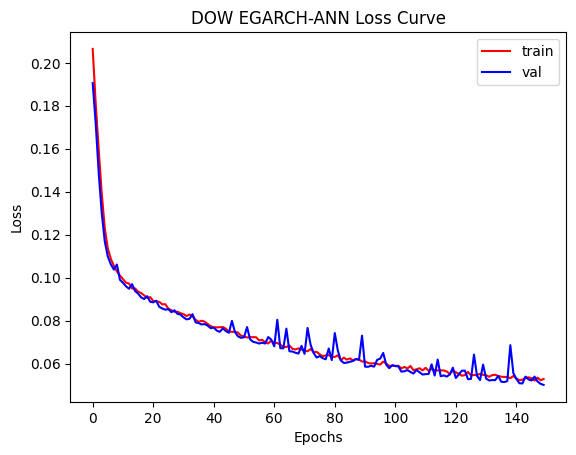

In [98]:
def plot_error(train_loss, val_loss):
    plt.plot(train_loss,c = 'r')
    plt.plot(val_loss,c = 'b')
    plt.ylabel('Loss')
    plt.xlabel('Epochs')
    plt.title("DOW EGARCH-ANN Loss Curve")
    plt.legend(['train', 'val'],loc = 'upper right')
    #plt.savefig('Thesis Document\\KF5 Figures\\NN (5,1,1)\\' + sector + '\\' + sector + ' - NN(5,1,1) Train vs. Validation.png')
    plt.show()
train_error2 = history2.history['loss']
val_error2 = history2.history['val_loss']
plot_error(train_error2, val_error2)

In [99]:
rolling_forecasts = []

# ITERATE OVER EACH TIME STEP IN THE VALIDATION SET
for i in range(len(ts_val)):

    # GET THE DATA AT ALL PREVIOUS TIME STEPS
    idx = val_idx[i]
    ts_train = returns[:idx]

    # TRAIN MODEL USING ALL PREVIOUS TIME STEPS' DATA
    model = arch_model(ts_train, p=1,o=1, q=1,
                       mean='constant', dist='normal')
    model_fit = model.fit(disp='off')

    # MAKE PREDICTION
    pred = (model_fit.forecast(horizon=1, reindex=False).variance.values[0][0])**.5

    # APPEND TO rolling_forecasts LIST
    rolling_forecasts.append(pred)

In [100]:
dataset = windowed_dataset(rolling_forecasts, window_size, batch_size, shuffle_buffer_size)
val_dataset = windowed_dataset(rolling_forecasts, window_size, 10, 1000)

In [101]:
model = Sequential()

model.add(Dense(1, input_shape=(window_size, ), activation="tanh"))
# model.add(Dense(4, activation="sigmoid"))
model.add(Dense(1))
opt = adam_v2.Adam(learning_rate=0.01, decay=1e-6)



model.compile(loss='mse', optimizer='adam', metrics=[tf.keras.metrics.MeanSquaredError()])



model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 1)                 15        
_________________________________________________________________
dense_25 (Dense)             (None, 1)                 2         
Total params: 17
Trainable params: 17
Non-trainable params: 0
_________________________________________________________________


In [102]:
history2 = model.fit(dataset, epochs=150, validation_data = val_dataset, verbose=1)

Epoch 1/150
209/209 [==============================] - 0s 1ms/step - loss: 0.1966 - mean_squared_error: 0.1159 - val_loss: 0.1837 - val_mean_squared_error: 0.1702
Epoch 2/150
209/209 [==============================] - 0s 826us/step - loss: 0.1749 - mean_squared_error: 0.1789 - val_loss: 0.1669 - val_mean_squared_error: 0.1751
Epoch 3/150
209/209 [==============================] - 0s 798us/step - loss: 0.1598 - mean_squared_error: 0.1743 - val_loss: 0.1529 - val_mean_squared_error: 0.1704
Epoch 4/150
209/209 [==============================] - 0s 826us/step - loss: 0.1481 - mean_squared_error: 0.1677 - val_loss: 0.1428 - val_mean_squared_error: 0.1647
Epoch 5/150
209/209 [==============================] - 0s 785us/step - loss: 0.1394 - mean_squared_error: 0.1636 - val_loss: 0.1348 - val_mean_squared_error: 0.1597
Epoch 6/150
209/209 [==============================] - 0s 797us/step - loss: 0.1315 - mean_squared_error: 0.1569 - val_loss: 0.1280 - val_mean_squared_error: 0.1542
Epoch 7/150


209/209 [==============================] - 0s 850us/step - loss: 0.0263 - mean_squared_error: 0.0709 - val_loss: 0.0245 - val_mean_squared_error: 0.0704
Epoch 51/150
209/209 [==============================] - 0s 782us/step - loss: 0.0252 - mean_squared_error: 0.0699 - val_loss: 0.0243 - val_mean_squared_error: 0.0695
Epoch 52/150
209/209 [==============================] - 0s 892us/step - loss: 0.0245 - mean_squared_error: 0.0691 - val_loss: 0.0231 - val_mean_squared_error: 0.0686
Epoch 53/150
209/209 [==============================] - 0s 867us/step - loss: 0.0238 - mean_squared_error: 0.0682 - val_loss: 0.0226 - val_mean_squared_error: 0.0678
Epoch 54/150
209/209 [==============================] - 0s 834us/step - loss: 0.0240 - mean_squared_error: 0.0674 - val_loss: 0.0218 - val_mean_squared_error: 0.0669
Epoch 55/150
209/209 [==============================] - 0s 818us/step - loss: 0.0226 - mean_squared_error: 0.0665 - val_loss: 0.0213 - val_mean_squared_error: 0.0661
Epoch 56/150
209/

209/209 [==============================] - 0s 802us/step - loss: 0.0118 - mean_squared_error: 0.0438 - val_loss: 0.0125 - val_mean_squared_error: 0.0436
Epoch 100/150
209/209 [==============================] - 0s 776us/step - loss: 0.0121 - mean_squared_error: 0.0435 - val_loss: 0.0113 - val_mean_squared_error: 0.0433
Epoch 101/150
209/209 [==============================] - 0s 796us/step - loss: 0.0127 - mean_squared_error: 0.0432 - val_loss: 0.0108 - val_mean_squared_error: 0.0430
Epoch 102/150
209/209 [==============================] - 0s 807us/step - loss: 0.0118 - mean_squared_error: 0.0429 - val_loss: 0.0108 - val_mean_squared_error: 0.0427
Epoch 103/150
209/209 [==============================] - 0s 831us/step - loss: 0.0113 - mean_squared_error: 0.0426 - val_loss: 0.0107 - val_mean_squared_error: 0.0424
Epoch 104/150
209/209 [==============================] - 0s 814us/step - loss: 0.0116 - mean_squared_error: 0.0423 - val_loss: 0.0105 - val_mean_squared_error: 0.0421
Epoch 105/15

209/209 [==============================] - 0s 817us/step - loss: 0.0111 - mean_squared_error: 0.0330 - val_loss: 0.0095 - val_mean_squared_error: 0.0329
Epoch 149/150
209/209 [==============================] - 0s 804us/step - loss: 0.0117 - mean_squared_error: 0.0328 - val_loss: 0.0096 - val_mean_squared_error: 0.0328
Epoch 150/150
209/209 [==============================] - 0s 803us/step - loss: 0.0109 - mean_squared_error: 0.0327 - val_loss: 0.0118 - val_mean_squared_error: 0.0326


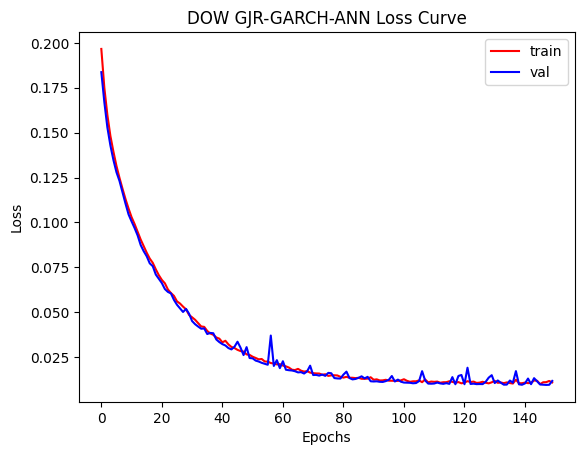

In [103]:
def plot_error(train_loss, val_loss):
    plt.plot(train_loss,c = 'r')
    plt.plot(val_loss,c = 'b')
    plt.ylabel('Loss')
    plt.xlabel('Epochs')
    plt.title("DOW GJR-GARCH-ANN Loss Curve")
    plt.legend(['train', 'val'],loc = 'upper right')
    #plt.savefig('Thesis Document\\KF5 Figures\\NN (5,1,1)\\' + sector + '\\' + sector + ' - NN(5,1,1) Train vs. Validation.png')
    plt.show()
train_error2 = history2.history['loss']
val_error2 = history2.history['val_loss']
plot_error(train_error2, val_error2)